# Introduction

You have been hired as a ML engineer in a local bank. The bank has been receiving a lot of emails containing links to phishing websites. Your task is to dev a ML model for predicting whether or not an email that contains a link to a site is a phishing website or not.
- Load and understand the data
- Query the dataset - get some insight from it
- Clear the dataset with the target of working with a ML 
- Build and then train the ML model - logistic regression
- Perform hyperparameter tuning trchniques - random search
- Report that will summarize the performance of the ML model

A number of tools that will be used
- numpy
- pandas
- matplotlib
- sckit learn
- wandb - recording the result

In [1]:
# Filter uneccessary warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# import pandas and numpy

In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
# Results that are reproducible -> seeding

In [7]:
np.random.seed(7)

# Reading the data

In [8]:
data=pd.read_csv('Phishing.csv')

In [9]:
data.head().T

,0,1,2,3,4
having_IP_Address,-1,1,1,1,1
URL_Length,1,1,0,0,0
Shortining_Service,1,1,1,1,-1
having_At_Symbol,1,1,1,1,1
double_slash_redirecting,-1,1,1,1,1
Prefix_Suffix,-1,-1,-1,-1,-1
having_Sub_Domain,-1,0,-1,-1,1
SSLfinal_State,-1,1,-1,-1,1
Domain_registeration_length,-1,-1,-1,1,-1
Favicon,1,1,1,1,1


In [10]:
data.tail()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1
11054,-1,-1,1,1,1,-1,-1,-1,1,1,...,1,1,-1,1,-1,-1,-1,1,-1,-1


In [11]:
data.sample(10).T

,6838,6085,8240,173,6664,9373,7703,7995,7951,6887
having_IP_Address,1,-1,1,-1,-1,1,-1,1,-1,-1
URL_Length,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
Shortining_Service,1,1,1,-1,-1,1,1,1,-1,1
having_At_Symbol,1,1,-1,1,1,1,1,1,1,1
double_slash_redirecting,1,1,1,-1,-1,1,1,1,-1,1
Prefix_Suffix,-1,-1,-1,1,-1,1,1,-1,1,-1
having_Sub_Domain,-1,0,-1,-1,1,-1,1,-1,0,0
SSLfinal_State,-1,-1,-1,1,1,1,1,-1,1,-1
Domain_registeration_length,1,-1,-1,-1,1,-1,-1,1,-1,1
Favicon,1,1,1,1,1,-1,1,1,1,1


In [12]:
data.shape

(11055, 31)

In [13]:
data.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [14]:
data['Result'].unique()

array([-1,  1], dtype=int64)

The value -1 denotes a phishing website and i denotes a normal site. This means we can solve this problem as a binary classification problem, in which we want to classify a site as either a phishing site or not based on the features.

# Checking the Class distribution of the data

In [15]:
# We need to import the counter class

In [16]:
from collections import Counter

In [17]:
classes = Counter(data['Result'].values)

In [18]:
classes.most_common()

[(1, 6157), (-1, 4898)]

In [19]:
6157 + 4898

11055

In [20]:
6157/11055 * 100

55.69425599276345

In [21]:
# we can create a dataframe to display the results better

In [22]:
class_dist = pd.DataFrame(classes.most_common(), columns=['Class', 'Num_Observations'])

In [23]:
class_dist

,Class,Num_Observations
0,1,6157
1,-1,4898


In [24]:
import matplotlib.pyplot as plt

In [25]:
# plots to appear in the notebook

In [26]:
%matplotlib inline

In [27]:
#stylize the plots

In [28]:
plt.style.use('ggplot')

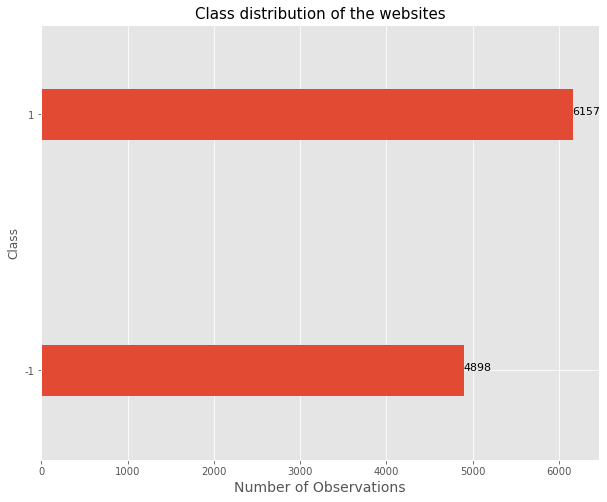

In [29]:
subplot = class_dist.groupby('Class') ['Num_Observations'].sum().plot(kind='barh', width=0.2, figsize=(10,8))
subplot.set_title('Class distribution of the websites', fontsize=15)
subplot.set_xlabel('Number of Observations', fontsize=14)
for i in subplot.patches:
    subplot.text(i.get_width()+ 0.1, i.get_y()+ 0.1, str(i.get_width()), fontsize=11)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [31]:
 data.describe().T # missing values

,count,mean,std,min,25%,50%,75%,max
having_IP_Address,11055.0,0.313795,0.949534,-1.0,-1.0,1.0,1.0,1.0
URL_Length,11055.0,-0.633198,0.766095,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,11055.0,0.738761,0.673998,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,11055.0,0.700588,0.713598,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,11055.0,0.741474,0.671011,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,11055.0,-0.734962,0.678139,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,11055.0,0.063953,0.817518,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,11055.0,0.250927,0.911892,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,11055.0,-0.336771,0.941629,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11055.0,0.628584,0.777777,-1.0,1.0,1.0,1.0,1.0


In this dataset we do not have missing values, however this is a big problem for most models

# Cleaning the class labels

It is not good practice to create ML models with label values that  the models. We change the value -1 to 0

In [32]:
#rebase the values
data.rename(columns={'Result': 'Class'}, inplace=True)

In [33]:
data.head().T

,0,1,2,3,4
having_IP_Address,-1,1,1,1,1
URL_Length,1,1,0,0,0
Shortining_Service,1,1,1,1,-1
having_At_Symbol,1,1,1,1,1
double_slash_redirecting,-1,1,1,1,1
Prefix_Suffix,-1,-1,-1,-1,-1
having_Sub_Domain,-1,0,-1,-1,1
SSLfinal_State,-1,1,-1,-1,1
Domain_registeration_length,-1,-1,-1,1,-1
Favicon,1,1,1,1,1


In [34]:
data['Class'] = data['Class'].map({-1:0, 1:1 })

In [35]:
data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Class
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,0
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,0
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,0
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,0
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [36]:
data['Class'].unique()

array([0, 1], dtype=int64)

In [37]:
data.isna().sum() # return all values that is not a number and sum em

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Class     

## Split the dataset

In [38]:
# we split the data to 80:20, Meanig 80% is for trainning and 20% is for testing 

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
# X the independent variable is defined in capital
# ilocate values from col zero to 31
X=data.iloc[:, 0:30].values.astype(int)

In [41]:
X

array([[-1,  1,  1, ...,  1,  1, -1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  0,  1, ...,  1,  0, -1],
       ...,
       [ 1, -1,  1, ...,  1,  0,  1],
       [-1, -1,  1, ...,  1,  1,  1],
       [-1, -1,  1, ..., -1,  1, -1]])

In [42]:
y=data.iloc[:,30].values.astype(int)
# get the last column which is 31 index 30 ie Class - these are the class labels

In [43]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.seed(7))

In [45]:
X_train.shape

(8844, 30)

In [46]:
X_test.shape

(2211, 30)

In [47]:
8844/(8844+2211) * 100
# train data is 80 percent

80.0

In [48]:
2211/(8844+2211) * 100

20.0

In [49]:
y.shape

(11055,)

In [50]:
y_train.shape

(8844,)

In [51]:
y_test.shape

(2211,)

In [52]:
data

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Class
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,0
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,0
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,0
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,0
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,0
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,0
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,0


# Creating logistic regression model

In [53]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
from sklearn.linear_model import LogisticRegression
# !pip install wandb -qqq
import wandb
import time

In [54]:
# we create a uttility function that can be re-used

In [55]:
def train_eval_pipeline(model, train_data, test_data, name):
    #initialize wandb and give proj a name
    wandb.init(project='ML for phishing website detection', name=name)
    #assign the data
    (X_train, y_train) = train_data
    (X_test, y_test) = test_data
    
    #Train the model
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time() - start
    prediction = model.predict(X_test)
    
    wandb.log({"accuracy": accuracy_score(y_test, prediction) * 100, "precision": precision_recall_fscore_support(y_test, prediction, average='macro')[0], "recall" : precision_recall_fscore_support(y_test, prediction, average='macro')[1], "training_time" : end})
    print("Accuracy of the Logistic Regression classifier with default hyperparameter values {0: .2f}%".format(accuracy_score(y_test, prediction)*100.))
    print("\n")
    print("---classification report of the Logistic Regression Classifier with default parameter values ---")
    print("\n")
    print(classification_report(y_test, prediction, target_names=["Phishing Websites", "Normal Websites"]))

In [56]:
logreg = LogisticRegression()

In [57]:
logreg

LogisticRegression()

In [58]:
train_eval_pipeline(logreg, (X_train, y_train), (X_test, y_test), "Logistic_Regression_Phishing_Websites")

wandb: Currently logged in as: austinmula (use `wandb login --relogin` to force relogin)


Accuracy of the Logistic Regression classifier with default hyperparameter values  93.71%


---classification report of the Logistic Regression Classifier with default parameter values ---


                   precision    recall  f1-score   support

Phishing Websites       0.94      0.92      0.93       974
  Normal Websites       0.94      0.95      0.94      1237

         accuracy                           0.94      2211
        macro avg       0.94      0.94      0.94      2211
     weighted avg       0.94      0.94      0.94      2211



# Can we improve the Model?

A good way to start approaching is to tune the hyperparameters of the model. We need to define the grid of the values for the hyperparameters that we need to tune. For this example  we use the random search for hyperparameter tuning

In [59]:
# Import the GridSearchCV

In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
#Define the grid of the vals

In [62]:
penalty = ["l1", "l2"]

In [63]:
C = [0.8, 0.9, 1.0]

In [64]:
tol = [0.01, 0.001, 0.0001]

In [65]:
max_iter = [100, 150, 200, 250]

In [66]:
# Create a dict where tol and max_iter are keys and lists
# of their values are the corresponding values

In [67]:
param_grid = dict(penalty = penalty, C = C, tol = tol, max_iter = max_iter)

In [68]:
# Now that we have the grid, we look for a set of hyperpameter values

In [69]:
# We instantiate RandomizedSearchCV with the required parameters

In [70]:
random_model = RandomizedSearchCV(estimator= logreg, param_distributions=param_grid, cv=5)

In [71]:
#fit the model to the data

In [72]:
random_model_result=random_model.fit(X_train, y_train)

In [73]:
#summarize the results

In [74]:
best_score, best_params = random_model_result.best_score_,random_model_result.best_params_

In [75]:
print('Best score: %.2f using %s'%(best_score* 100.,best_params))

Best score: 92.41 using {'tol': 0.01, 'penalty': 'l2', 'max_iter': 100, 'C': 0.9}


Comments - Random search did not help much in boosting the accuracy.
We use the hyperparamameter valuesand train another Logistic Regression Model with the values


In [76]:
# Log the resuklts of the hyperparameters in wandb

In [77]:
config=wandb.config

In [78]:
config.tol=0.01

In [79]:
config.penalty = "l2"

In [80]:
config.C=0.9

In [81]:
#Train the model

In [82]:
logreg = LogisticRegression(tol=config.tol, penalty= config.penalty, max_iter=100, C=config.C)

In [83]:
logreg

LogisticRegression(C=0.9, tol=0.01)

In [84]:
train_eval_pipeline(logreg, (X_train, y_train), (X_test, y_test), "Logistic-Regression-Random-Search")

accuracy,93.71325
precision,0.93703
recall,0.9353
training_time,0.11701


accuracy,▁
precision,▁
recall,▁
training_time,▁


Accuracy of the Logistic Regression classifier with default hyperparameter values  93.71%


---classification report of the Logistic Regression Classifier with default parameter values ---


                   precision    recall  f1-score   support

Phishing Websites       0.94      0.92      0.93       974
  Normal Websites       0.94      0.95      0.94      1237

         accuracy                           0.94      2211
        macro avg       0.94      0.94      0.94      2211
     weighted avg       0.94      0.94      0.94      2211

